## So sánh các phương pháp Over-sampling 

Chúng ta sẽ xác định xem liệu các thuật toán oversampling mà chúng ta đã học có cải thiện chất lượng của Random Forest trên các tập dữ liệu khác nhau với các lớp mất cân bằng không.

In [1]:
from collections import Counter

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

from imblearn.datasets import fetch_datasets

from imblearn.over_sampling import (
    RandomOverSampler,
    SMOTE,
    ADASYN,
    BorderlineSMOTE,
    SVMSMOTE,
)

In [2]:
oversampler_dict = {

    'random': RandomOverSampler(
        sampling_strategy='auto',
        random_state=0),

    'smote': SMOTE(
        sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
        random_state=0,  # khả năng tái lặp
        k_neighbors=5,
        n_jobs=4),

    'adasyn': ADASYN(
        sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
        random_state=0,  # khả năng tái lặp
        n_neighbors=5,
        n_jobs=4),

    'border1': BorderlineSMOTE(
        sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
        random_state=0,  # khả năng tái lặp
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-1',
        n_jobs=4),

    'border2': BorderlineSMOTE(
        sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
        random_state=0,  # khả năng tái lặp
        k_neighbors=5,
        m_neighbors=10,
        kind='borderline-2',
        n_jobs=4),

    'svm': SVMSMOTE(
        sampling_strategy='auto',  # chỉ lấy mẫu lớp thiểu số
        random_state=0,  # khả năng tái lặp
        k_neighbors=5,
        m_neighbors=10,
        n_jobs=4,
        svm_estimator=SVC(kernel='linear')),
}

In [3]:
datasets_ls = [
    'car_eval_34',
    'ecoli',
    'thyroid_sick',
    'arrhythmia',
    'ozone_level'
]

In [4]:
# in ra mất cân bằng lớp
## Yêu cầu 1:
## VIẾT CODE Ở ĐÂY:
for dataset in datasets_ls:
    data = fetch_datasets()[dataset]
    print(dataset)
    print(Counter(data.target))
    print()

car_eval_34
Counter({-1: 1594, 1: 134})

ecoli
Counter({-1: 301, 1: 35})

thyroid_sick
Counter({-1: 3541, 1: 231})

arrhythmia
Counter({-1: 427, 1: 25})

ozone_level
Counter({-1: 2463, 1: 73})



<details><summary> Gợi ý </summary>

Sử dụng ```dataset```

</details>

In [5]:
# hàm huấn luyện random forest và đánh giá chất lượng

def run_randomForests(X_train, X_test, y_train, y_test):

    rf = RandomForestClassifier(
        n_estimators=100, random_state=39, max_depth=2, n_jobs=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print(
        'Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

    return roc_auc_score(y_test, pred[:, 1])

In [8]:
# lưu kết quả
results_dict = {}
shapes_dict = {}

## Yêu cầu 2:
## VIẾT CODE Ở ĐÂY:

for dataset in datasets_ls:
    
    results_dict[dataset] = {}
    shapes_dict[dataset] = {}
    
    print(dataset)
    
    # load tập dữ liệu
    data = fetch_datasets()[dataset]
    
    # tách thành tập huấn luyện và tập kiểm tra
    X_train, X_test, y_train, y_test = train_test_split(
    data.data,  
    data.target, 
    test_size=0.3,
    random_state=0)
    
    # do một số kỹ thuật oversampling sử dụng KNN
    # chúng ta thiết lập các biến ở cùng một tỷ lệ
    scaler = MinMaxScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
        
    roc = run_randomForests(X_train, X_test, y_train, y_test)
    
    # lưu trữ kết quả
    results_dict[dataset]['full_data'] = roc
    shapes_dict[dataset]['full_data'] = len(X_train)
    
    print()
    
    for oversampler in oversampler_dict.keys():
        
        print(oversampler)
        
        # lấy lại mẫu
        X_resampled, y_resampled = oversampler_dict[oversampler].fit_resample(X_train, y_train)
        
        # đánh giá chất lượng
        roc = run_randomForests(X_resampled, X_test, y_resampled, y_test)
        
        # lưu trữ kết quả
        results_dict[dataset]["full_data"] = roc
        shapes_dict[dataset]["full_data"] = len(X_resampled)
        print()
        
    print()
        

car_eval_34
Train set
Random Forests roc-auc: 0.9581261802905924
Test set
Random Forests roc-auc: 0.9440504133074803

random
Train set
Random Forests roc-auc: 0.9867662928276872
Test set
Random Forests roc-auc: 0.9847688539646903

smote
Train set


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random Forests roc-auc: 0.9892067644300562
Test set
Random Forests roc-auc: 0.982268598836616

adasyn
Train set
Random Forests roc-auc: 0.9884019149663742
Test set
Random Forests roc-auc: 0.9811460353097254

border1
Train set
Random Forests roc-auc: 0.9892200125897663
Test set
Random Forests roc-auc: 0.9863506480253086

border2


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9908744267159981
Test set
Random Forests roc-auc: 0.9877538524339218

svm
Train set
Random Forests roc-auc: 0.9898226031268869
Test set
Random Forests roc-auc: 0.9834677007857945


ecoli
Train set
Random Forests roc-auc: 0.9716599190283401
Test set
Random Forests roc-auc: 0.9408212560386474

random
Train set
Random Forests roc-auc: 0.9687507154140244
Test set
Random Forests roc-auc: 0.961352657004831

smote
Train set
Random Forests roc-auc: 0.9773356837068748
Test set
Random Forests roc-auc: 0.9601449275362319

adasyn


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9715029552490853
Test set
Random Forests roc-auc: 0.967391304347826

border1
Train set
Random Forests roc-auc: 0.9769121586044276
Test set
Random Forests roc-auc: 0.9806763285024154

border2
Train set
Random Forests roc-auc: 0.9631371917556127
Test set
Random Forests roc-auc: 0.9800724637681159

svm


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9779080149263981
Test set
Random Forests roc-auc: 0.9613526570048309


thyroid_sick
Train set
Random Forests roc-auc: 0.9646448684059303
Test set
Random Forests roc-auc: 0.9521203914568843

random
Train set
Random Forests roc-auc: 0.9625854099125659
Test set
Random Forests roc-auc: 0.9562565396688618

smote


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9605968807461769
Test set
Random Forests roc-auc: 0.9487843909644857

adasyn
Train set
Random Forests roc-auc: 0.9582371083546223
Test set
Random Forests roc-auc: 0.9547424139841201

border1


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9617160200097215
Test set
Random Forests roc-auc: 0.9432572167169323

border2
Train set
Random Forests roc-auc: 0.9549813630506218
Test set
Random Forests roc-auc: 0.9343694220471472

svm


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9694301766481193
Test set
Random Forests roc-auc: 0.9401797254877824


arrhythmia
Train set
Random Forests roc-auc: 0.9931143025772182
Test set
Random Forests roc-auc: 0.8515625

random
Train set
Random Forests roc-auc: 0.9989821142940236
Test set
Random Forests roc-auc: 0.8984375

smote
Train set
Random Forests roc-auc: 0.9987919598214785
Test set
Random Forests roc-auc: 0.908203125

adasyn


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9996085054977014
Test set
Random Forests roc-auc: 0.93359375

border1
Train set
Random Forests roc-auc: 0.9985123208912652
Test set
Random Forests roc-auc: 0.796875

border2
Train set
Random Forests roc-auc: 0.9961504792260556
Test set


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Random Forests roc-auc: 0.8095703125

svm
Train set
Random Forests roc-auc: 0.9983006417789027
Test set
Random Forests roc-auc: 0.8955078125


ozone_level
Train set
Random Forests roc-auc: 0.9333229162016161
Test set
Random Forests roc-auc: 0.8202702702702702

random
Train set
Random Forests roc-auc: 0.9478515890133454
Test set
Random Forests roc-auc: 0.8238416988416988

smote


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9554774113770573
Test set
Random Forests roc-auc: 0.8274774774774776

adasyn
Train set
Random Forests roc-auc: 0.9493674427893772
Test set
Random Forests roc-auc: 0.8293436293436293

border1


C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Train set
Random Forests roc-auc: 0.9830520064310351
Test set
Random Forests roc-auc: 0.8708494208494209

border2
Train set
Random Forests roc-auc: 0.9409829930586457
Test set
Random Forests roc-auc: 0.8462033462033461

svm
Train set
Random Forests roc-auc: 0.9823188644029144
Test set
Random Forests roc-auc: 0.8615186615186615




C:\Users\NCPC\AppData\Local\Programs\Python\Python311\Lib\site-packages\imblearn\over_sampling\_smote\filter.py:461: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


<details><summary> Gợi ý </summary>

Sử dụng ```dataset``` và ```oversampler```

</details>

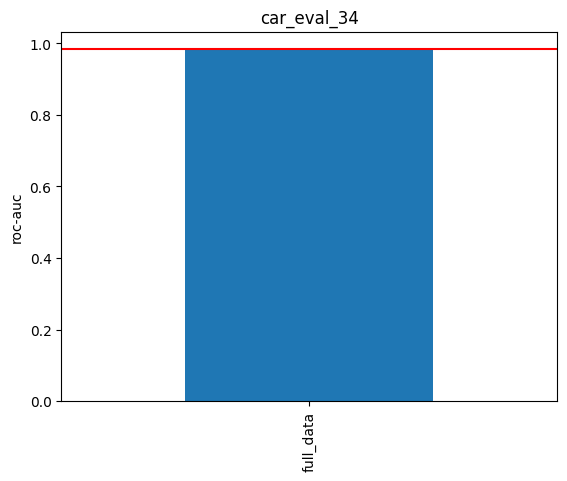

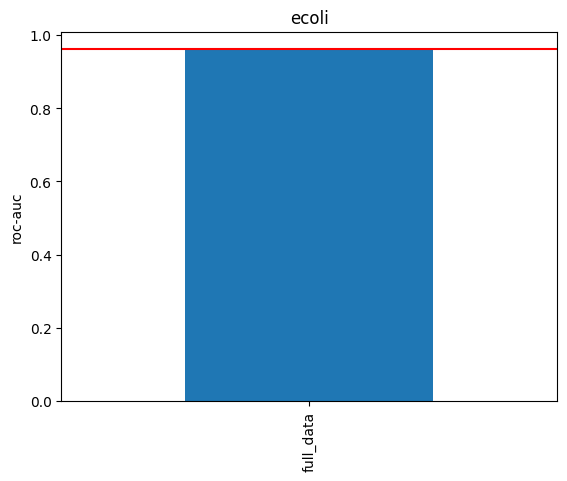

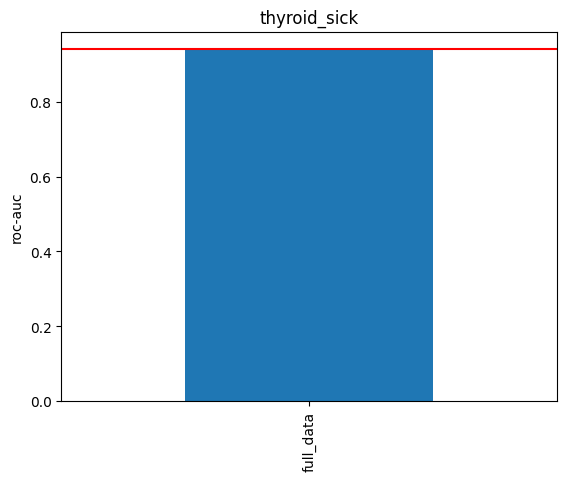

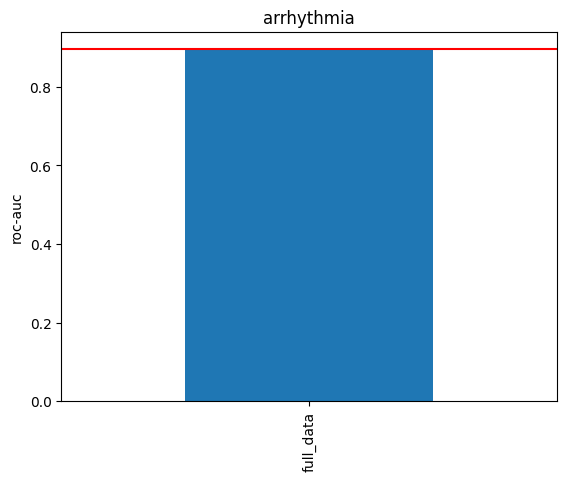

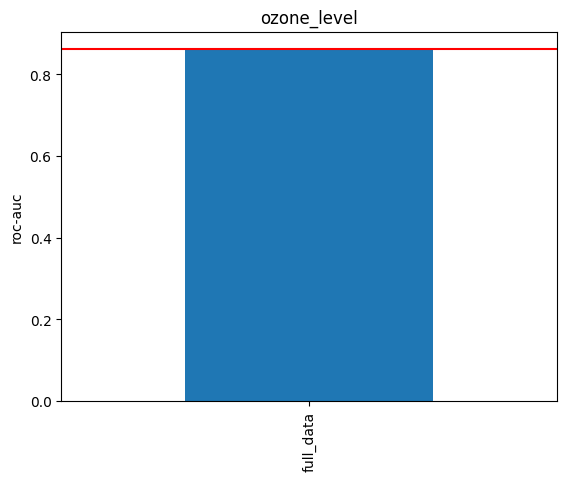

In [9]:
for dataset in datasets_ls:
    ## Yêu cầu 3:
    ## VIẾT CODE Ở ĐÂY:
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
#     plt.ylim(0.55, 0.9)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

<details><summary> Gợi ý </summary>

Sử dụng ```bar()``` để vẽ biểu đồ rồi sử dụng ```axhline()```

</details>

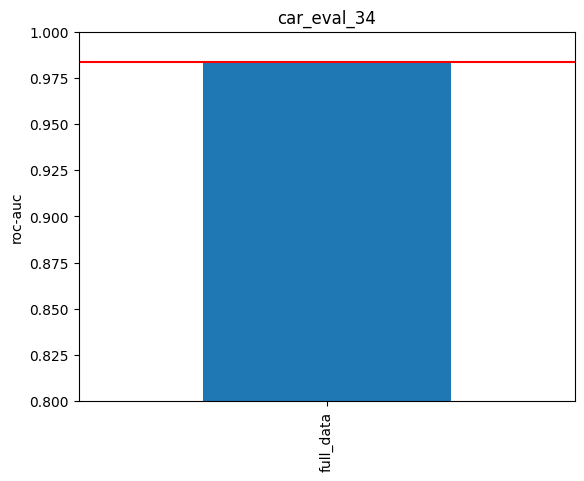

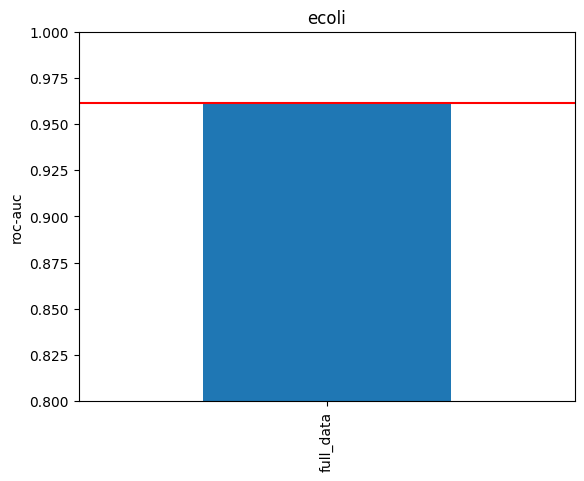

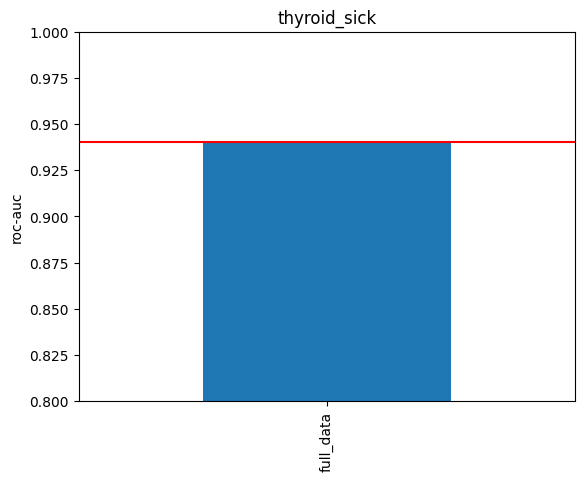

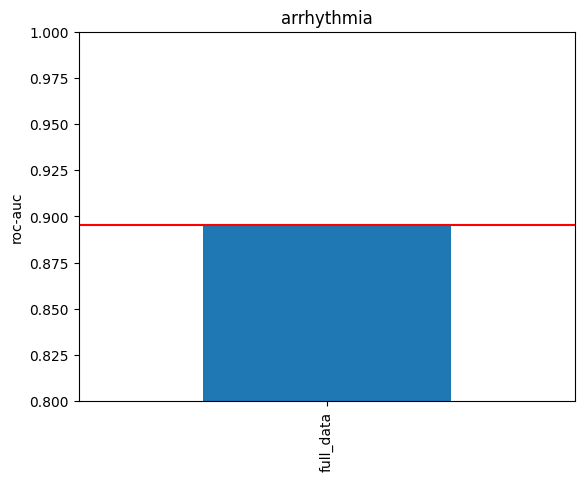

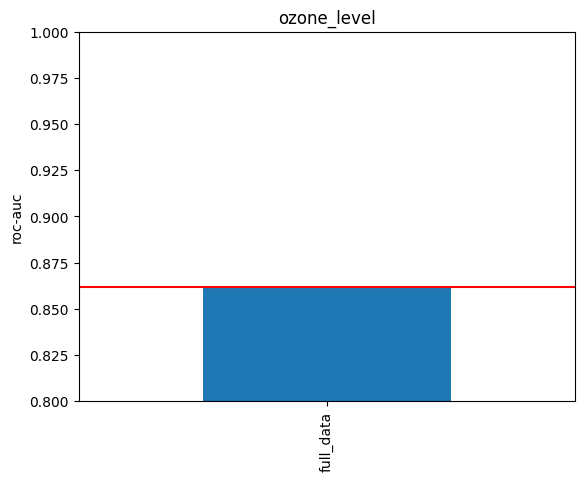

In [10]:
for dataset in datasets_ls:
    ## Yêu cầu 4:
    ## VIẾT CODE Ở ĐÂY:
    pd.Series(results_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('roc-auc')
    plt.ylim(0.8, 1)
    plt.axhline(results_dict[dataset]['full_data'], color='r')
    plt.show()

**Các kỹ thuật oversampling hoạt động tốt hơn trên các tập dữ liệu khác nhau.** 

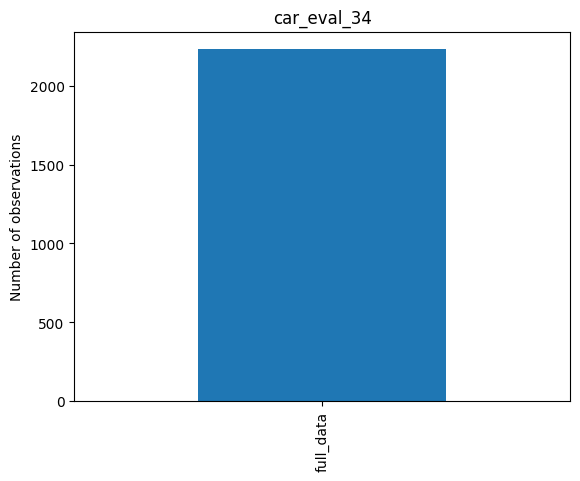

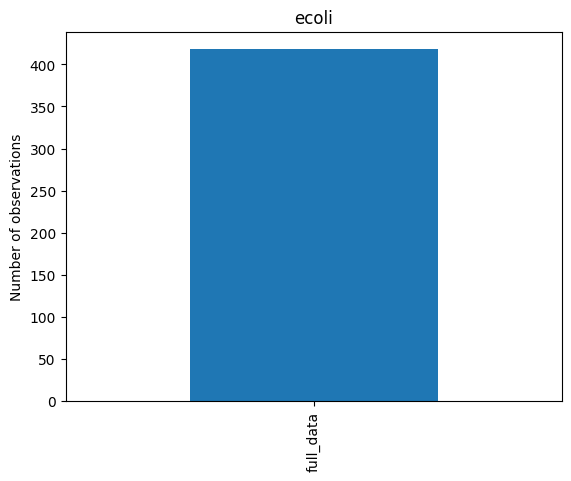

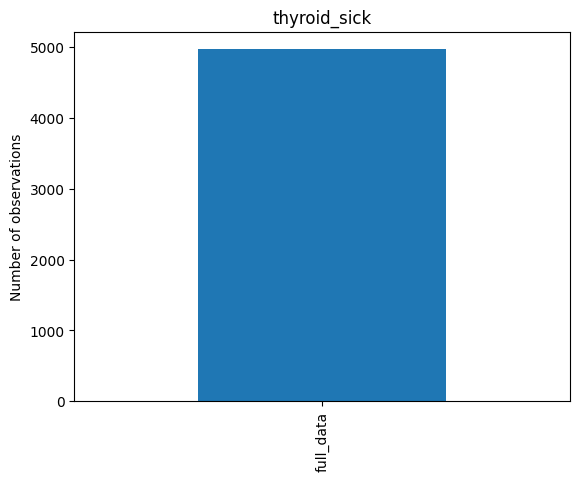

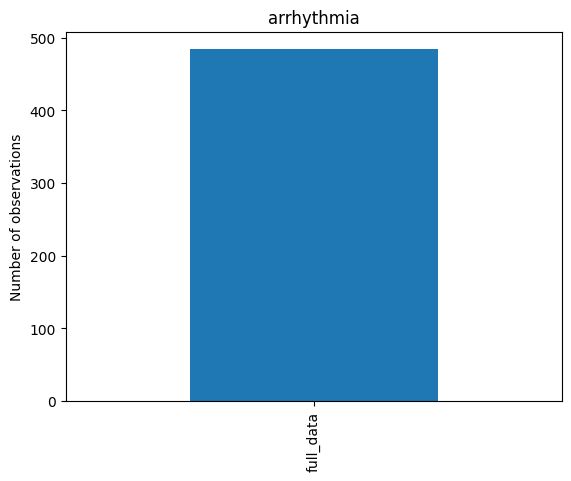

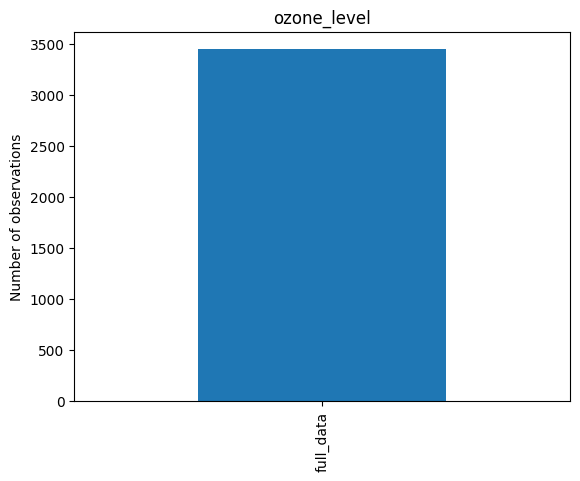

In [11]:
for dataset in datasets_ls:
    
    pd.Series(shapes_dict[dataset]).plot.bar()
    plt.title(dataset)
    plt.ylabel('Number of observations')
    plt.show()